定义：
列表和元组都是可以保存任意类型的有序集合。

In [ ]:
mylist = [1,2,"hello","world"]
mylist

[1, 2, 'hello', 'world']

In [ ]:
tup = (1,2,"hello")
tup

(1, 2, 'hello')

差异：
列表是可动态变化的，元组是静态不可变的。

In [ ]:
mylist[1] = 3
mylist

[1, 3, 'hello', 'world']

In [ ]:
tup[1] = 3

TypeError: ignored

要给元组添加元素，其实会新建一个元组，并把数据复制过去

而列表直接在末尾添加即可

In [ ]:
new_tup = tup + (5,)

In [ ]:
tup

(1, 2, 'hello')

In [ ]:
new_tup

(1, 2, 'hello', 5)

In [ ]:
mylist.append(5)

In [ ]:
mylist

[1, 3, 'hello', 'world', 5]

列表和元组都支持负数索引和切片(左闭右开)

In [ ]:
mylist[-1]

5

In [ ]:
tup[-1]

'hello'

In [ ]:
mylist[1:2]

[3]

In [ ]:
tup[1:]

(2, 'hello')

支持嵌套

In [ ]:
mylist = [[1,2],["hello","world"]]

In [ ]:
mylist

[[1, 2], ['hello', 'world']]

In [ ]:
tup = ((1,2),(3))

In [ ]:
tup

((1, 2), 3)

可通过list()和tuple()函数互换

In [ ]:
mylist = list(tup)
mylist

[(1, 2), 3]

In [ ]:
tup = tuple(mylist)
tup

((1, 2), 3)

列表和元组常用的内置函数

In [ ]:
mylist = [1,2,3,3,5,8]


In [ ]:
mylist.count(3)

2

In [ ]:
mylist.index(8)

5

In [ ]:
mylist.reverse()  # 元组没有
mylist

[8, 5, 3, 3, 2, 1]

In [ ]:
mylist.sort() # 元组没有
mylist

[1, 2, 3, 3, 5, 8]

In [ ]:
tup = (1,2,8,5,7)

In [ ]:
tup.index(8)

2

In [ ]:
tup.count(1)

1

In [ ]:
list(reversed(tup))   #reversed() 返回倒转后的迭代器

[7, 5, 8, 2, 1]

In [ ]:
sorted(tup)

[1, 2, 5, 7, 8]

列表和元组存储的差异

In [4]:
mylist = []
mylist.__sizeof__()


40

In [5]:
mylist = [1,2,3]
mylist.__sizeof__()

64

In [6]:
tup = ()
tup.__sizeof__()

24

In [7]:
tup = (1,2,3)
tup.__sizeof__()

48

列表是动态的，元组是静态的，在存储方式上必然有所不同。

列表的底层存储结构：[listobject.h](https://github.com/python/cpython/blob/949fe976d5c62ae63ed505ecf729f815d0baccfc/Include/listobject.h)：


    typedef struct {
        PyObject_VAR_HEAD
        /* Vector of pointers to list elements.  list[0] is ob_item[0], etc. */
        PyObject **ob_item;

        /* ob_item contains space for 'allocated' elements.  The number
        * currently in use is ob_size.
        * Invariants:
        *     0 <= ob_size <= allocated
        *     len(list) == ob_size
        *     ob_item == NULL implies ob_size == allocated == 0
        * list.sort() temporarily sets allocated to -1 to detect mutations.
        *
        * Items must normally not be NULL, except during construction when
        * the list is not yet visible outside the function that builds it.
        */
        Py_ssize_t allocated;
    } PyListObject;

* PyObject_VAR_HEAD: 变长对象的公共头部信息
* ob_item：一个二级指针(指向指针数组)，指向一个PyObject *类型的指针数组，这个指针数组保存的便是对象的指针，而操作底层数组都是通过ob_item来进行操作的。
* allocated：容量, 我们知道列表底层是使用了C的数组, 而底层数组的长度就是列表的容量

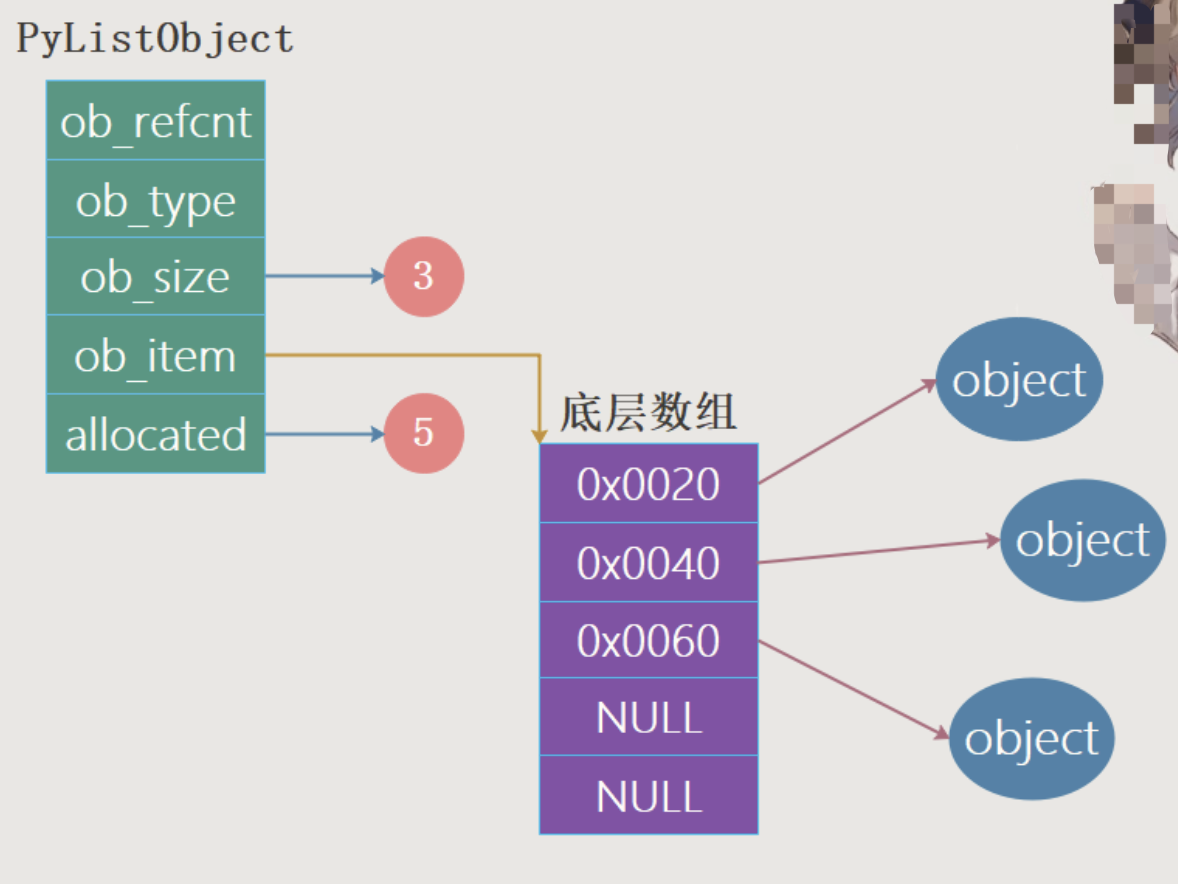

列表占用内存大小计算：

* PyObject_VAR_HEAD: 24字节
* ob_item: 二级指针, 8字节
* allocated: 8字节

注意：列表计算大小时，ob_item指向的指针数组大小也要包含进来，所以计算公式时：列表大小 = 40 + 指针数组大小 * 8 （指针大小为8字节）。



In [8]:
print([1,2,'x'*100].__sizeof__())  # 40 + 3 * 8 = 64 注意，虽然里面有个长度为100个x的字符串，但列表存储的是指针（8字节）

64


In [9]:
print([1,2,3].__sizeof__()) # 64
print([(1,2,3)].__sizeof__()) #48

64
48


元组的底层存储结构：[tupleobject.h](https://github.com/python/cpython/blob/3d75bd15ac82575967db367c517d7e6e703a6de3/Include/tupleobject.h#L25)


    typedef struct {
        PyObject_VAR_HEAD
        PyObject *ob_item[1];

        /* ob_item contains space for 'ob_size' elements.
        * Items must normally not be NULL, except during construction when
        * the tuple is not yet visible outside the function that builds it.
        */
    } PyTupleObject;

ob_item：指针数组（1可以想象成n）

In [10]:
tup = ()
print(tup.__sizeof__())

24


In [13]:
tup = (1) # 不等于 24 + 8 = 32
print(tup.__sizeof__())

28


In [17]:
tup = (1.0)
print(tup.__sizeof__())

24


In [14]:
tup = ('hello')
print(tup.__sizeof__())

54


In [15]:
tup = (1, 'hello')
print(tup.__sizeof__())

40


猜测：从上面的执行结果来看，当元组只包含1个元素时，底层不是存储这个元素的指针，而是这个值本身。


容易踩坑的点：浅拷贝和深拷贝。

浅拷贝：只是指针拷贝一份，但指向的对象是同一份；
深拷贝：指针和指向的对象都拷贝一份。

示例：


In [21]:
import copy

mylist = [[]]
# 浅拷贝
mylistcopy = mylist.copy()

print(id(mylist[0]), id(mylistcopy[0])) # 两个对象相同

140415463749640 140415463749640


In [22]:
mylist[0].append(3)
print(mylist[0],mylistcopy[0])

[3] [3]


In [23]:
mylistcopy[0].append(4)
print(mylist[0],mylistcopy[0])

[3, 4] [3, 4]


In [26]:
mylist = [[]]

# 深拷贝
mylistcopy = copy.deepcopy(mylist)

print(id(mylist[0]), id(mylistcopy[0])) # 变成不同的两个对象了

140415463650696 140415463827464


In [27]:
mylist[0].append(3)
print(mylist[0],mylistcopy[0])

[3] []


注意：copy.deepcopy虽然在拷贝指针的同时会将指针指向的对象也拷贝一份，但这仅仅是针对于可变对象，对于不可变对象是不会拷贝的。例如：

In [28]:
mylist = [[], "hellowold"]  # 字符串不可变
mylistcopy = copy.deepcopy(mylist)

print(mylist[0] is mylistcopy[0]) #False
print(mylist[1] is mylistcopy[1]) #True

False
True


列表还有一些陷阱：

In [29]:
mylist = [[]] * 5
print(mylist)
mylist[0].append('a')
print(mylist) # [['a'], ['a'], ['a'], ['a'], ['a']]

# 列表乘上一个n，等于把列表里面的元素重复n次
# 注意: 类似于lst = [1, 2, 3], 虽然我们写的是整数，但是它存储的并不是整数，而是其指针
# 所以会把指针重复5次, 因此列表里面5个指针都指向了同一个列表

[[], [], [], [], []]
[['a'], ['a'], ['a'], ['a'], ['a']]


In [30]:
# 这种方式创建的话，里面的元素都指向了不同的列表
lst = [[], [], [], [], []]
lst[0].append(1)
print(lst)  # [[1], [], [], [], []]


# 再比如字典，在后续系列中会说
d = dict.fromkeys([1, 2, 3, 4], [])
print(d)  # {1: [], 2: [], 3: [], 4: []}
d[1].append(123)
print(d)  # {1: [123], 2: [123], 3: [123], 4: [123]}
# 它们都指向了同一个列表，因此这种陷阱在工作中要注意, 因为一不小心就会出现大问题

[[1], [], [], [], []]
{1: [], 2: [], 3: [], 4: []}
{1: [123], 2: [123], 3: [123], 4: [123]}


性能分析：

元组比列表要轻量一些，性能要好一些：

* 一方面是因为由于其不可变性，使得在编译的时候就确定了；
* 另一方面就是它还具有静态资源缓存的作用。

但如果是索引操作的话，两者性能相差不大，可忽略不计

In [34]:
from timeit import timeit

t1 = timeit(stmt="x1 = [1,2,3,4,5]", number=1000000)
t2 = timeit(stmt="x2 = (1,2,3,4,5)",number=1000000)

print(round(t1,2))
print(round(t2,2))


0.06
0.01


In [37]:
!python3 -m timeit -s 'x=[1,2,3,4,5,6]' 'y=x[3]'

10000000 loops, best of 3: 0.0234 usec per loop


In [38]:
!python3 -m timeit -s 'x=(1,2,3,4,5,6)' 'y=x[3]'

10000000 loops, best of 3: 0.0238 usec per loop


应用场景：

1. 如果存储的数据和数量不变，比如你有一个函数，需要返回的是一个地点的经纬度，然后直接传给前端渲染，那么肯定选用元组更合适。

2. 如果存储的数据或数量是可变的，比如社交平台上的一个日志功能，是统计一个用户在一周之内看了哪些用户的帖子，那么则用列表更合适


总结：

总的来说，列表和元组都是有序的，可以存储任意数据类型的集合，区别主要在于下面这两点。

列表是动态的，长度可变，可以随意的增加、删减或改变元素。列表的存储空间略大于元组，性能略逊于元组。

元组是静态的，长度大小固定，不可以对元素进行增加、删减或者改变操作。元组相对于列表更加轻量级，性能稍优。

参考：

1. [解密Python中列表的底层实现](https://www.cnblogs.com/traditional/p/13461463.html)